# Implement a KNN model to classify the animals in to categorie

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Zoo.csv')
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
data.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

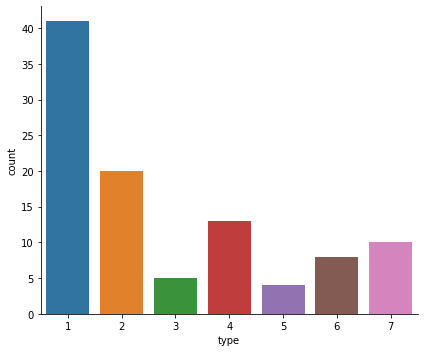

In [6]:
sns.factorplot('type', data=data, kind="count",size = 5,aspect =1.2)
plt.show()

<AxesSubplot:>

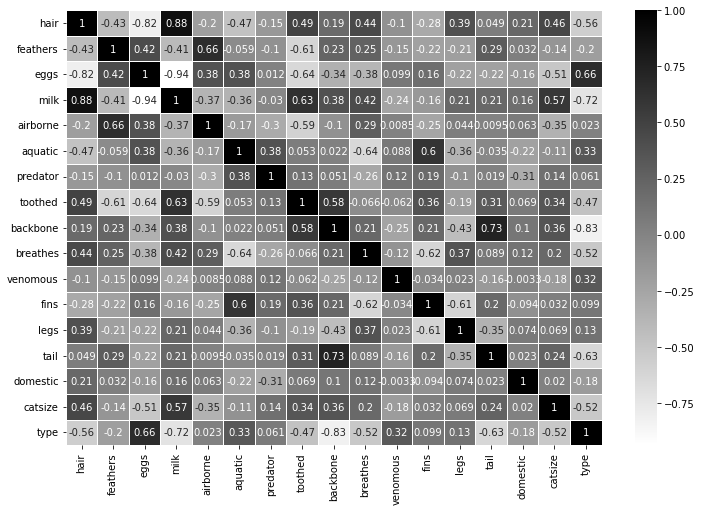

In [7]:
plt.figure(figsize= (12,8))
sns.heatmap(data.corr(),annot=True,linewidths=1, cmap=plt.cm.gist_gray_r)

Milk and Egg are Heighly correlated and also eggs and hair are heighly correlated

In [8]:
data.drop(['animal name','eggs'],axis=1) # droped animalname and eggs column

,hair,feathers,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [9]:
x = data.drop(['animal name','eggs'],axis=1).iloc[:,:-1]
y = data.drop(['animal name','eggs'],axis=1).iloc[:,-1]

### KFold method

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score

In [11]:
kfold = KFold(n_splits=5)

In [12]:
model = KNeighborsClassifier(n_neighbors=5)
result = cross_val_score(model, x, y, cv = kfold)
result

array([0.85714286, 1.        , 0.95      , 0.7       , 0.75      ])

In [13]:
result.mean()

0.8514285714285714

### Train Test Split method

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25,  stratify= y)

In [16]:
model2 = KNeighborsClassifier(n_neighbors= 5).fit(x_train, y_train)
model2.predict(x_train)

score = accuracy_score(model2.predict(x_train), y_train)
score

0.9066666666666666

In [17]:
model2.predict(x_test)

score = accuracy_score(model2.predict(x_test), y_test)
score

0.8076923076923077

In [26]:
score_knn=cross_val_score(model2, x, y, cv=5)
print(" K-Nearest Neighbors Accuracy: %0.2f (+/- %0.2f)" % (score_knn.mean(), score_knn.std() * 2))
score_knn.mean()

 K-Nearest Neighbors Accuracy: 0.85 (+/- 0.11)


0.8504761904761905

### Hyperparameter Tuning of K Using GridsearchCV Algorithm

In [19]:
from sklearn.model_selection import GridSearchCV

In [27]:
model3=KNeighborsClassifier()
grid = GridSearchCV(estimator= model3, param_grid = {'n_neighbors': np.array(range(2,20))})
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [28]:
grid.cv

In [29]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003742,0.001196,0.007304,0.004114,2,{'n_neighbors': 2},0.952381,0.85,0.95,0.85,0.95,0.910476,0.049386,1
1,0.002765,0.000696,0.003394,0.001554,3,{'n_neighbors': 3},0.952381,0.85,0.90,0.90,0.95,0.910476,0.037934,1
2,0.002615,0.000583,0.002981,0.000031,4,{'n_neighbors': 4},0.952381,0.85,0.85,0.90,0.95,0.900476,0.045261,3
3,0.002406,0.000483,0.002399,0.000491,5,{'n_neighbors': 5},0.952381,0.80,0.85,0.80,0.85,0.850476,0.055643,4
4,0.002194,0.000402,0.002616,0.000502,6,{'n_neighbors': 6},0.904762,0.80,0.85,0.80,0.85,0.840952,0.038960,5
5,0.002455,0.000456,0.002716,0.000850,7,{'n_neighbors': 7},0.857143,0.75,0.85,0.75,0.85,0.811429,0.050224,6
6,0.002397,0.000492,0.003603,0.000486,8,{'n_neighbors': 8},0.809524,0.75,0.85,0.75,0.70,0.771905,0.052238,7
7,0.002200,0.000400,0.002800,0.000749,9,{'n_neighbors': 9},0.809524,0.75,0.80,0.75,0.70,0.761905,0.039584,8
8,0.002601,0.000491,0.003403,0.000487,10,{'n_neighbors': 10},0.809524,0.75,0.80,0.75,0.70,0.761905,0.039584,8
9,0.002601,0.000491,0.003715,0.000622,11,{'n_neighbors': 11},0.809524,0.75,0.80,0.75,0.70,0.761905,0.039584,8


In [30]:
grid.best_score_

0.9104761904761904

In [31]:
grid.best_params_

{'n_neighbors': 2}

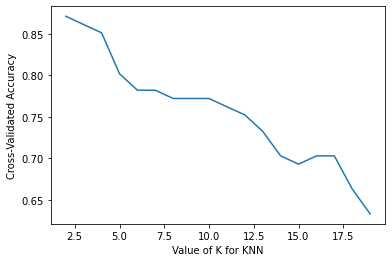

In [32]:
k_range = range(2, 20)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=2)
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Best score is n_neighbors = 2

### Building a Model for k = 2

In [35]:
model3 = KNeighborsClassifier(n_neighbors= 2).fit(x_train, y_train)
model3.predict(x_train)

array([1, 2, 1, 4, 1, 4, 7, 1, 1, 1, 2, 2, 2, 1, 1, 6, 1, 6, 2, 2, 1, 4,
       1, 7, 4, 1, 1, 1, 2, 3, 1, 6, 6, 2, 2, 1, 4, 1, 1, 4, 7, 7, 1, 1,
       1, 4, 7, 4, 5, 1, 1, 1, 6, 6, 2, 1, 3, 5, 1, 2, 4, 1, 7, 1, 2, 3,
       1, 1, 3, 1, 2, 2, 2, 4, 6], dtype=int64)

In [36]:
accuracy_score(model3.predict(x_train), y_train)


0.96

this is the accuraccy for train data

In [37]:
accuracy_score(model3.predict(x_test), y_test)


0.9615384615384616

This is the Accuracy for test data 